In [1]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df=pd.read_csv(r"C:\Users\uzuma\Downloads\diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [8]:
cols=x.columns

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
mn=MinMaxScaler()

In [11]:
x=mn.fit_transform(x)
x=pd.DataFrame(x,columns=cols)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,shuffle=True,stratify=y)

In [14]:
import statsmodels.api as sm

In [15]:
x_train=sm.add_constant(x_train)

In [16]:
model=sm.GLM(y_train,x_train,family=sm.families.Binomial()).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  576
Model:                            GLM   Df Residuals:                      567
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -270.05
Date:                Sat, 06 Jul 2024   Deviance:                       540.10
Time:                        16:14:43   Pearson chi2:                     673.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2995
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.3262      0.824    -10.111      0.000      -9.940      -6.712
Pregnancies                  2.2588      0.639      3.532      0.000       1.006       3.512
Glucose                      7.1055      0.865      8.210      0.000       5.409       8.802
BloodPressure               -1.3828      0.743     -1.862      0.063      -2.839       0.073
SkinThickness               -0.0418      0.802     -0.052      0.958      -1.613       1.530
Insulin                     -0.6901      1.003     -0.688      0.491      -2.656       1.276
BMI                          6.3471      1.189      5.339      0.000       4.017       8.677
DiabetesPedigreeFunction     1.6997      0.801      2.121      0.034       0.129       3.270
Age                          0.7630      0.626      1.218      0.223      -0.465       1.991
============================================================================================
"""

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
vif={x_train.columns[i]:variance_inflation_factor(x_train,i)for i in range(1,x_train.shape[1])}

In [20]:
vif

{'Pregnancies': np.float64(1.3918804732531957),
 'Glucose': np.float64(1.3314599102674618),
 'BloodPressure': np.float64(1.1509363549248934),
 'SkinThickness': np.float64(1.5161594996115977),
 'Insulin': np.float64(1.5376146112918767),
 'BMI': np.float64(1.260534683538713),
 'DiabetesPedigreeFunction': np.float64(1.0828145844584196),
 'Age': np.float64(1.5475891722354709)}

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lg= LogisticRegression()

In [23]:
from sklearn.feature_selection import RFE

In [24]:
rfe= RFE(estimator=lg,n_features_to_select=20)

In [25]:
rfe.fit(x_train,y_train)

C:\Users\uzuma\anaconda3\envs\ml\lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=20 > n_features=9. There will be no feature selection and all features will be kept.
  warnings.warn(


RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [26]:
rfe.estimator_

LogisticRegression()

In [27]:
x_train=x_train[x_train.columns[rfe.support_]]

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lg=LogisticRegression(random_state=0)

In [30]:
lg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [31]:
x_test=sm.add_constant(x_test)

In [32]:
x_test=x_test[x_test.columns[rfe.support_]]

In [33]:
lg.score(x_train,y_train)

0.7881944444444444

In [34]:
lg.score(x_test,y_test)

0.7447916666666666

In [35]:
lg_prob=lg.predict_proba(x_test)

In [36]:
lg_prob=lg_prob[:,1]

In [37]:
result=pd.DataFrame(lg_prob,columns=["Lg_Prob"])

In [38]:
result

,Lg_Prob
0,0.414318
1,0.360924
2,0.160220
3,0.434256
4,0.695824
...,...
187,0.066499
188,0.257634
189,0.235380
190,0.351104


In [39]:
pred=lg.predict(x_test)
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dc=DecisionTreeClassifier()

In [42]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
dc.score(x_train,y_train)

1.0

In [44]:
dc.score(x_test,y_test)

0.765625

In [45]:
dc_prob= dc.predict_proba(x_test)[:,1]

In [46]:
result["DTC_prob"]= dc_prob

In [47]:
result

,Lg_Prob,DTC_prob
0,0.414318,0.0
1,0.360924,1.0
2,0.160220,0.0
3,0.434256,0.0
4,0.695824,1.0
...,...,...
187,0.066499,0.0
188,0.257634,0.0
189,0.235380,0.0
190,0.351104,1.0


In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn=KNeighborsClassifier(n_neighbors=5,metric="manhattan")

In [50]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan')

In [51]:
knn.score(x_train,y_train)

0.8159722222222222

In [52]:
knn.score(x_test,y_test)

0.7083333333333334

In [53]:
train_score=[]
test_score=[]
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i,metric="manhattan")
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

In [54]:
train_score

[1.0,
 0.8315972222222222,
 0.8454861111111112,
 0.8090277777777778,
 0.8159722222222222,
 0.7899305555555556,
 0.7916666666666666,
 0.7795138888888888,
 0.7864583333333334]

In [55]:
test_score

[0.6979166666666666,
 0.7135416666666666,
 0.6927083333333334,
 0.71875,
 0.7083333333333334,
 0.7239583333333334,
 0.734375,
 0.7552083333333334,
 0.75]

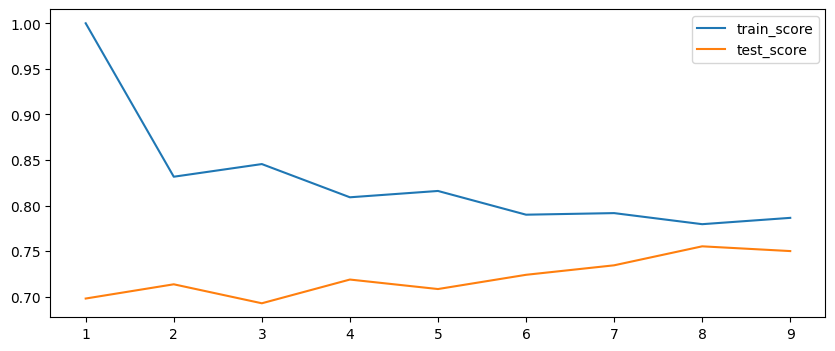

In [56]:
rg=list(range(1,10))
plt.figure(figsize=(10,4))
plt.plot(rg,train_score,label="train_score")
plt.plot(rg,test_score,label="test_score")
plt.legend()
plt.show()

In [57]:
knn=KNeighborsClassifier(n_neighbors=8,metric="manhattan")

In [58]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=8)

In [59]:
knn.score(x_train,y_train)

0.7795138888888888

In [60]:
knn.score(x_test,y_test)

0.7552083333333334

In [61]:
knn_prob=knn.predict_proba(x_test)[:,1]

In [62]:
result["KNN_Prob"]=knn_prob

In [63]:
result

,Lg_Prob,DTC_prob,KNN_Prob
0,0.414318,0.0,0.125
1,0.360924,1.0,0.250
2,0.160220,0.0,0.125
3,0.434256,0.0,0.250
4,0.695824,1.0,0.750
...,...,...,...
187,0.066499,0.0,0.000
188,0.257634,0.0,0.375
189,0.235380,0.0,0.250
190,0.351104,1.0,0.375


In [64]:
result["Prob_avg"]=(result["KNN_Prob"]+result["DTC_prob"]+result["Lg_Prob"])/3

In [65]:
result

,Lg_Prob,DTC_prob,KNN_Prob,Prob_avg
0,0.414318,0.0,0.125,0.179773
1,0.360924,1.0,0.250,0.536975
2,0.160220,0.0,0.125,0.095073
3,0.434256,0.0,0.250,0.228085
4,0.695824,1.0,0.750,0.815275
...,...,...,...,...
187,0.066499,0.0,0.000,0.022166
188,0.257634,0.0,0.375,0.210878
189,0.235380,0.0,0.250,0.161793
190,0.351104,1.0,0.375,0.575368


In [66]:
vr=[]
for i in result["Prob_avg"]:
    if i<0.5:
        vr.append(0)
    else:
        vr.append(1)

In [67]:
result["Output"]=vr

In [68]:
result

,Lg_Prob,DTC_prob,KNN_Prob,Prob_avg,Output
0,0.414318,0.0,0.125,0.179773,0
1,0.360924,1.0,0.250,0.536975,1
2,0.160220,0.0,0.125,0.095073,0
3,0.434256,0.0,0.250,0.228085,0
4,0.695824,1.0,0.750,0.815275,1
...,...,...,...,...,...
187,0.066499,0.0,0.000,0.022166,0
188,0.257634,0.0,0.375,0.210878,0
189,0.235380,0.0,0.250,0.161793,0
190,0.351104,1.0,0.375,0.575368,1


In [69]:
result['Actual_value']=np.array(y_test)

In [70]:
result

,Lg_Prob,DTC_prob,KNN_Prob,Prob_avg,Output,Actual_value
0,0.414318,0.0,0.125,0.179773,0,1
1,0.360924,1.0,0.250,0.536975,1,0
2,0.160220,0.0,0.125,0.095073,0,0
3,0.434256,0.0,0.250,0.228085,0,1
4,0.695824,1.0,0.750,0.815275,1,1
...,...,...,...,...,...,...
187,0.066499,0.0,0.000,0.022166,0,0
188,0.257634,0.0,0.375,0.210878,0,0
189,0.235380,0.0,0.250,0.161793,0,0
190,0.351104,1.0,0.375,0.575368,1,1


In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,fbeta_score,auc

In [72]:
con= confusion_matrix(result["Actual_value"],result["Output"])
print(con)

[[113  12]
 [ 26  41]]


In [73]:
pr= precision_score(result["Actual_value"],result["Output"])
pr

np.float64(0.7735849056603774)

In [74]:
re= recall_score(result["Actual_value"],result["Output"])
re

np.float64(0.6119402985074627)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
acc= accuracy_score(result["Actual_value"],result["Output"])
acc

0.8020833333333334

In [77]:
f1=f1_score(result["Actual_value"],result["Output"])
f1

np.float64(0.6833333333333333)

In [78]:
fbeta=fbeta_score(result["Actual_value"],result["Output"],beta=0.5)
fbeta

np.float64(0.7347670250896058)

In [79]:
from sklearn import metrics

In [80]:
probs=knn.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)

In [81]:
preds

array([0.125, 0.25 , 0.125, 0.25 , 0.75 , 0.25 , 0.125, 0.375, 0.875,
       0.   , 0.125, 0.75 , 0.125, 0.   , 0.375, 0.75 , 0.75 , 0.125,
       0.25 , 0.25 , 0.   , 0.375, 0.   , 0.875, 0.875, 0.625, 0.125,
       0.   , 0.75 , 0.75 , 0.125, 0.25 , 0.   , 0.125, 0.5  , 0.125,
       0.25 , 0.   , 0.25 , 0.   , 0.75 , 0.   , 0.125, 0.5  , 0.625,
       0.375, 0.75 , 0.375, 0.5  , 0.875, 0.25 , 0.5  , 0.625, 0.   ,
       0.5  , 0.75 , 0.75 , 0.125, 0.375, 0.5  , 0.625, 0.625, 0.625,
       0.   , 0.   , 1.   , 0.25 , 0.375, 0.   , 0.375, 0.125, 0.25 ,
       0.75 , 0.25 , 0.   , 0.125, 0.375, 0.375, 0.   , 0.   , 0.   ,
       0.75 , 0.   , 0.   , 0.75 , 0.625, 0.   , 0.125, 0.375, 0.   ,
       0.   , 0.5  , 0.   , 0.   , 0.125, 0.   , 0.25 , 0.125, 0.125,
       0.125, 0.5  , 0.5  , 0.125, 0.125, 1.   , 0.25 , 0.375, 0.5  ,
       0.75 , 0.375, 0.25 , 0.   , 0.125, 0.625, 0.875, 0.125, 0.375,
       0.375, 0.125, 0.625, 0.5  , 0.625, 0.125, 0.   , 0.25 , 0.375,
       0.25 , 0.5  ,

In [82]:
result

,Lg_Prob,DTC_prob,KNN_Prob,Prob_avg,Output,Actual_value
0,0.414318,0.0,0.125,0.179773,0,1
1,0.360924,1.0,0.250,0.536975,1,0
2,0.160220,0.0,0.125,0.095073,0,0
3,0.434256,0.0,0.250,0.228085,0,1
4,0.695824,1.0,0.750,0.815275,1,1
...,...,...,...,...,...,...
187,0.066499,0.0,0.000,0.022166,0,0
188,0.257634,0.0,0.375,0.210878,0,0
189,0.235380,0.0,0.250,0.161793,0,0
190,0.351104,1.0,0.375,0.575368,1,1


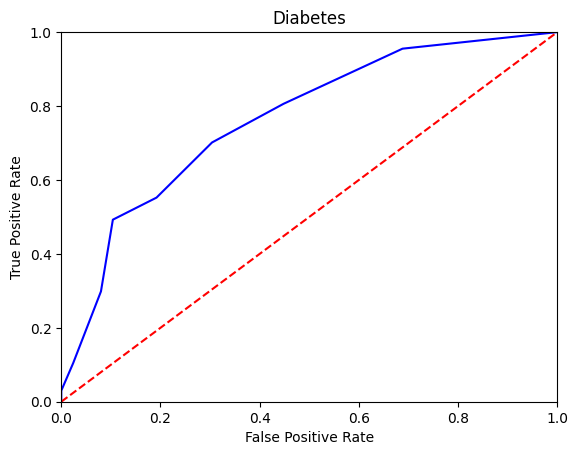

In [83]:
plt.title('Diabetes')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [85]:
model_dic={"Random_Forest_Classifier":RandomForestClassifier(), 
"Ada_Boost_Classifier":AdaBoostClassifier(),
"Gradient_Boosting_Classifier":GradientBoostingClassifier(),
"Decision_Tree_Classifier":DecisionTreeClassifier(),
"Logistic_Regression":LogisticRegression()}

In [86]:
train_score={}
test_score={}
train_prob={}
test_prob={}
for name,model in model_dic.items():
    model.fit(x_train,y_train)
    train_score[name]=model.score(x_train,y_train)
    test_score[name]=model.score(x_test,y_test)
    train_t= model.predict_proba(x_train)
    test_t=model.predict_proba(x_test)
    train_prob[name]=train_t[:,1]
    test_prob[name]=test_t[:,1]

C:\Users\uzuma\anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [87]:
train_score

{'Random_Forest_Classifier': 1.0,
 'Ada_Boost_Classifier': 0.8524305555555556,
 'Gradient_Boosting_Classifier': 0.9322916666666666,
 'Decision_Tree_Classifier': 1.0,
 'Logistic_Regression': 0.7881944444444444}

In [88]:
test_score

{'Random_Forest_Classifier': 0.7604166666666666,
 'Ada_Boost_Classifier': 0.734375,
 'Gradient_Boosting_Classifier': 0.7239583333333334,
 'Decision_Tree_Classifier': 0.7552083333333334,
 'Logistic_Regression': 0.7447916666666666}

In [89]:
result=pd.DataFrame(train_score.keys(),columns=["Model_name"])
result["Train_Evaluation_value"]=train_score.values()
result["Test_Evaluation_value"]=test_score.values()

In [90]:
result

,Model_name,Train_Evaluation_value,Test_Evaluation_value
0,Random_Forest_Classifier,1.000000,0.760417
1,Ada_Boost_Classifier,0.852431,0.734375
2,Gradient_Boosting_Classifier,0.932292,0.723958
3,Decision_Tree_Classifier,1.000000,0.755208
4,Logistic_Regression,0.788194,0.744792


In [91]:
probability_score=pd.DataFrame(train_prob.keys(),columns=["Model_Name"])
probability_score["Train_prob"]=train_prob.values()

In [92]:
probability_score_test=pd.DataFrame(test_prob.values())
probability_score_test=probability_score_test.T

In [93]:
probability_score_test=probability_score_test.rename(columns={0:'Random_Forest_Classifier',1:'Ada_Boost_Classifier',
                                                    2:'Gradient_Boosting_Classifier',3:'Decision_Tree_Classifier',
                                                    4:'Logistic_Regression'})

In [94]:
probability_score_test.columns

Index(['Random_Forest_Classifier', 'Ada_Boost_Classifier',
       'Gradient_Boosting_Classifier', 'Decision_Tree_Classifier',
       'Logistic_Regression'],
      dtype='object')

In [95]:
fpr_rfr, tpr_rfr, threshold_rfr = metrics.roc_curve(y_test,probability_score_test["Random_Forest_Classifier"] )
roc_auc_rfr = metrics.auc(fpr_rfr, tpr_rfr)
fpr_Ada_Boost, tpr_Ada_Boost, threshold_Ada_Boost = metrics.roc_curve(y_test,probability_score_test["Ada_Boost_Classifier"] )
roc_auc_Ada_Boost = metrics.auc(fpr_Ada_Boost, tpr_Ada_Boost)
fpr_Gradient, tpr_Gradient, threshold_Gradient = metrics.roc_curve(y_test,probability_score_test["Gradient_Boosting_Classifier"] )
roc_auc_Gradient = metrics.auc(fpr_Gradient, tpr_Gradient)
fpr_Decision, tpr_Decision, threshold_Decision = metrics.roc_curve(y_test,probability_score_test["Decision_Tree_Classifier"] )
roc_auc_Decision = metrics.auc(fpr_Decision, tpr_Decision)
fpr_Logistic, tpr_Logistic, threshold_Logistic = metrics.roc_curve(y_test,probability_score_test["Logistic_Regression"] )
roc_auc_Logistic = metrics.auc(fpr_Logistic, tpr_Logistic)

In [96]:
print("Random_Forest_Classifier",roc_auc_rfr)
print("Ada_Boost_Classifier",roc_auc_Ada_Boost)
print("Gradient_Boosting_Classifier",roc_auc_Gradient)
print("Decision_Tree_Classifier",roc_auc_Decision)
print("Logistic_Regression",roc_auc_Logistic)

Random_Forest_Classifier 0.8078805970149254
Ada_Boost_Classifier 0.8225074626865673
Gradient_Boosting_Classifier 0.8241194029850747
Decision_Tree_Classifier 0.7081194029850746
Logistic_Regression 0.8254328358208955


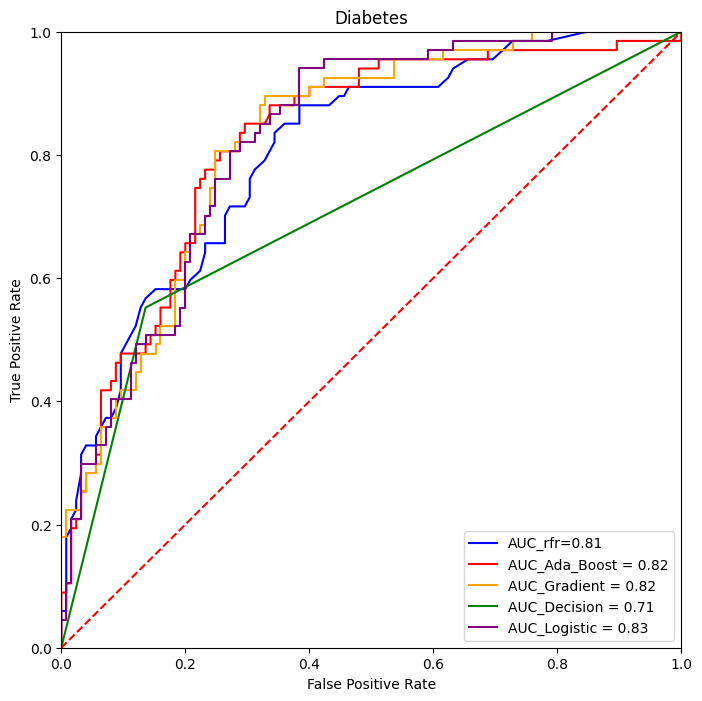

In [97]:
plt.figure(figsize=(8,8))
plt.title('Diabetes')
plt.plot(fpr_rfr,tpr_rfr,'b',label='AUC_rfr=%0.2f' %roc_auc_rfr)
plt.plot(fpr_Ada_Boost, tpr_Ada_Boost, 'r', label = 'AUC_Ada_Boost = %0.2f' % roc_auc_Ada_Boost)
plt.plot(fpr_Gradient, tpr_Gradient, 'orange', label = 'AUC_Gradient = %0.2f' % roc_auc_Gradient)
plt.plot(fpr_Decision, tpr_Decision, 'green', label = 'AUC_Decision = %0.2f' % roc_auc_Decision)
plt.plot(fpr_Logistic, tpr_Logistic, 'purple', label = 'AUC_Logistic = %0.2f' % roc_auc_Logistic)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
lr=LinearRegression()

In [100]:
from sklearn.feature_selection import RFE

In [101]:
rfe= RFE(estimator=lr,n_features_to_select=20)

In [102]:
rfe.fit(x_train,y_train)

C:\Users\uzuma\anaconda3\envs\ml\lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=20 > n_features=9. There will be no feature selection and all features will be kept.
  warnings.warn(


RFE(estimator=LinearRegression(), n_features_to_select=20)

In [103]:
rfe.estimator_

LinearRegression()

In [104]:
x_train=x_train[x_train.columns[rfe.support_]]

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
lr=LogisticRegression(random_state=0)

In [107]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [108]:
x_test=sm.add_constant(x_test)

In [109]:
x_test=x_test[x_test.columns[rfe.support_]]

In [110]:
lr.score(x_train,y_train)

0.7881944444444444

In [111]:
lr.score(x_test,y_test)

0.7447916666666666

In [115]:
lr=lr.predict(x_test)

In [116]:
Lr= pd.DataFrame(pred,columns=["Predictions"])

In [117]:
Lr["Actual_Data"]= np.array(y_test)

In [118]:
Lr

,Predictions,Actual_Data
0,0,1
1,0,0
2,0,0
3,0,1
4,1,1
...,...,...
187,0,0
188,0,0
189,0,0
190,0,1


In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
cn= confusion_matrix(pred,y_test)
print(cn)

[[110  34]
 [ 15  33]]
